In [43]:
import json
import csv
import os
import textstat
import matplotlib.pyplot as plt
import numpy as np


In [44]:
universities = {}


with open('../data/PublicUniversity.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        name = row['Name'].replace('/', '')
        number_students = row['Student population']
        universities[name] = number_students


In [47]:
FKGScores = []
FRESScores = []
GFIScores = []
NDCScores = []

student_population = []

#Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
#step = 1
for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
    #print(dirPath)
    #print(dirNames)
    #print(dirPath[-2:])
    #print(step)
    #step += 1
    for f in fileNames:
        #print(os.path.join(dirPath, f))
        #print(dirPath[36:])
        #print(dirNames)
        if f == "privacy_policy.json":
            with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                if data.get("privacy_policy"):
                    policy = data["privacy_policy"][0]            
                    if policy.get("policy_text"):
                        if policy.get("is_covid_specific"):
                            policy_text = policy.get("policy_text")
                            if type(policy_text) is list:
                                continue
                            FKG = textstat.flesch_kincaid_grade(policy_text)
                            FRES = textstat.flesch_reading_ease(policy_text)
                            NDC = textstat.dale_chall_readability_score(policy_text)
                            GFI = textstat.gunning_fog(policy_text)
                            FKGScores.append(FKG)
                            FRESScores.append(FRES)
                            NDCScores.append(NDC)
                            GFIScores.append(GFI)

                            university = dirPath.split('/')[3]
                            student_population.append(int(universities[university]))


                        

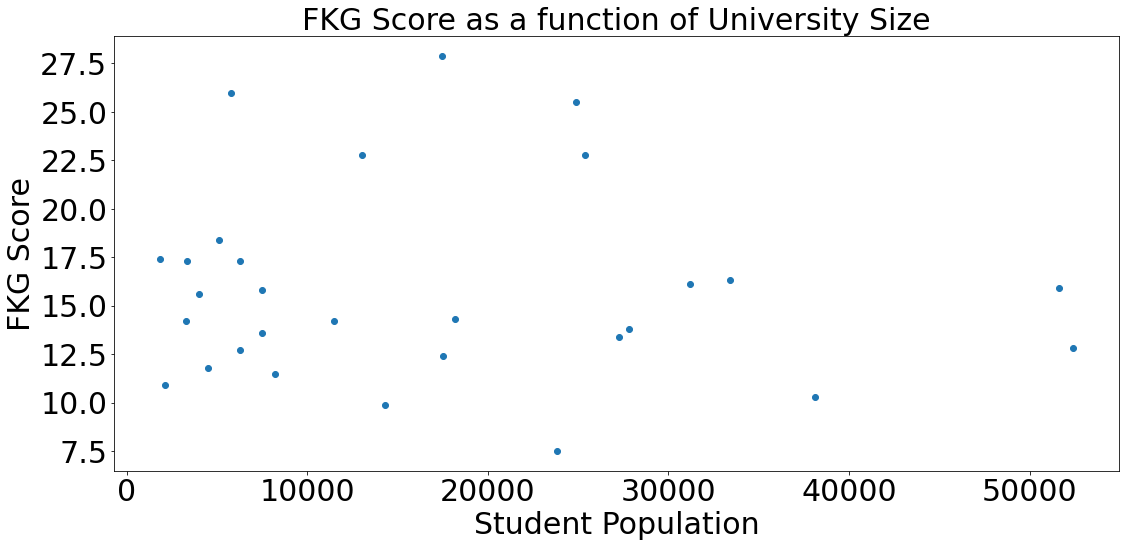

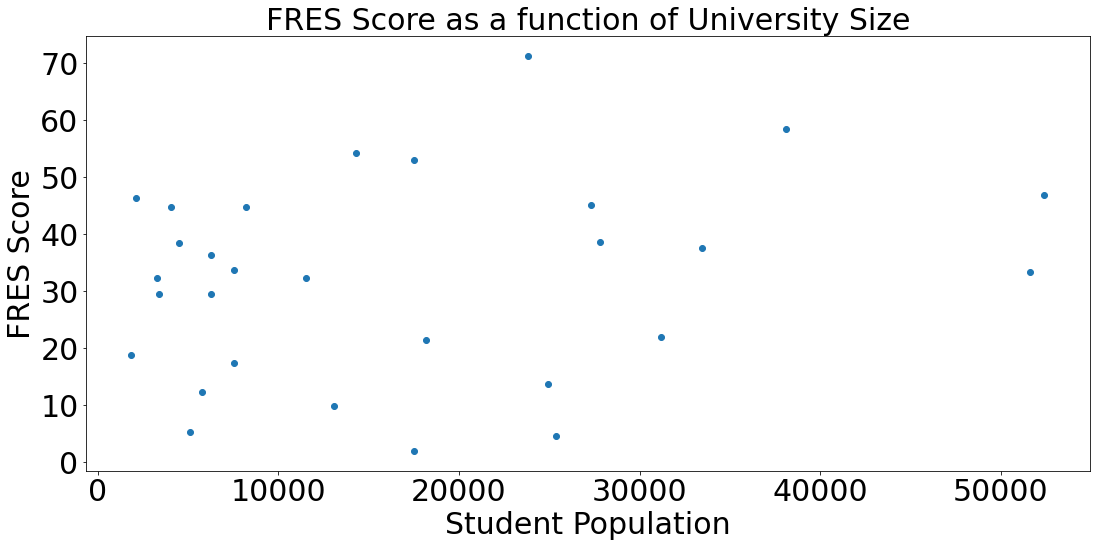

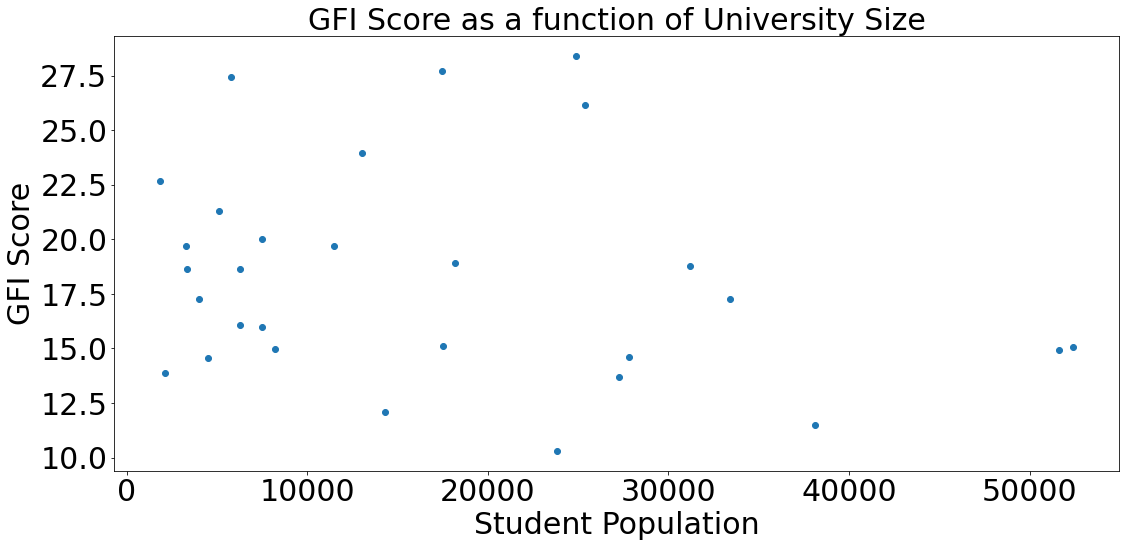

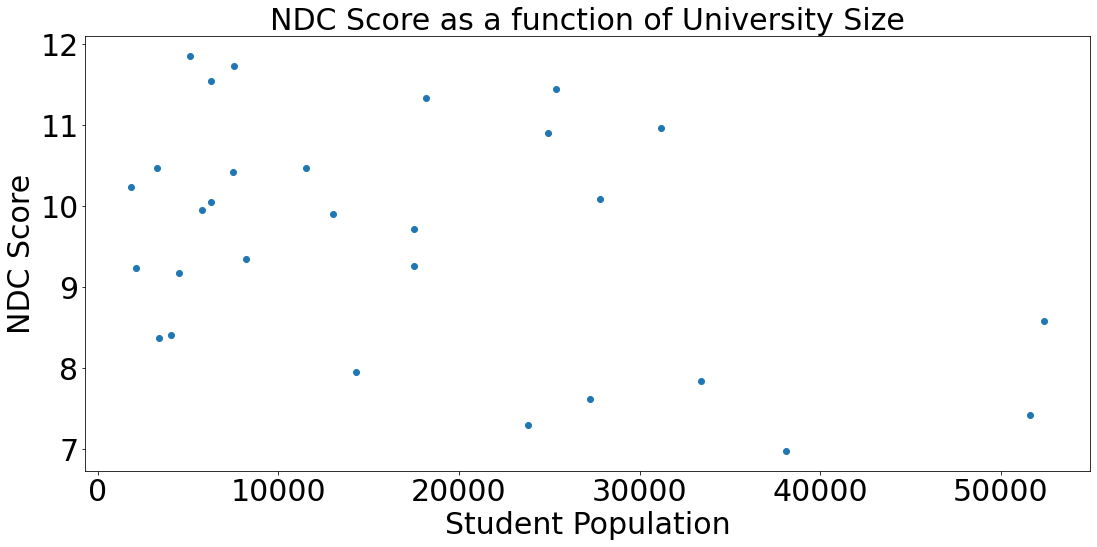

In [48]:
fig = plt.figure(figsize=(18,8))

plt.scatter(student_population, FKGScores)
plt.title('FKG Score as a function of University Size', fontsize=30)
plt.xlabel('Student Population', fontsize=30)
plt.ylabel('FKG Score', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig(f'../figures/FKG_function_of_campus_size.png')

plt.show()


fig = plt.figure(figsize=(18,8))

plt.scatter(student_population, FRESScores)
plt.title('FRES Score as a function of University Size', fontsize=30)
plt.xlabel('Student Population', fontsize=30)
plt.ylabel('FRES Score', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig(f'../figures/FRES_function_of_campus_size.png')

plt.show()


fig = plt.figure(figsize=(18,8))

plt.scatter(student_population, GFIScores)
plt.title('GFI Score as a function of University Size', fontsize=30)
plt.xlabel('Student Population', fontsize=30)
plt.ylabel('GFI Score', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig(f'../figures/GFI_function_of_campus_size.png')

plt.show()


fig = plt.figure(figsize=(18,8))

plt.scatter(student_population, NDCScores)
plt.title('NDC Score as a function of University Size', fontsize=30)
plt.xlabel('Student Population', fontsize=30)
plt.ylabel('NDC Score', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig(f'../figures/NDC_function_of_campus_size.png')

plt.show()


In [49]:
has_privacy_policy = []
student_population = []

#Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
#step = 1
for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
    #print(dirPath)
    #print(dirNames)
    #print(dirPath[-2:])
    #print(step)
    #step += 1
    for f in fileNames:
        #print(os.path.join(dirPath, f))
        #print(dirPath[36:])
        #print(dirNames)
        if f == "privacy_policy.json":
            with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:
                data = json.load(json_file)
                university = dirPath.split('/')[3]                            
                if data.get("has_self_reporting_site"):
                    student_population.append(int(universities[university]))
                    if data.get("privacy_policy")[0].get("policy_text"):
                        has_privacy_policy.append(True)
                    else:
                        has_privacy_policy.append(False)
                if not data.get("has_self_reporting_site") and data.get("note") and "self-reporting" in data.get("note") and "testing" not in data.get("note"):
                    print(data.get("note"))
                    student_population.append(int(universities[university]))
                    has_privacy_policy.append(False)
                    
                    
                        

self-reporting is via email
self-reporting via phone
self-reporting is via email
self-reporting site is via email
self-reporting is via email
self-reporting via email
self-reporting is via email
self-reporting via email
self-reporting via email
self-reporting is via email
self-reporting is via email


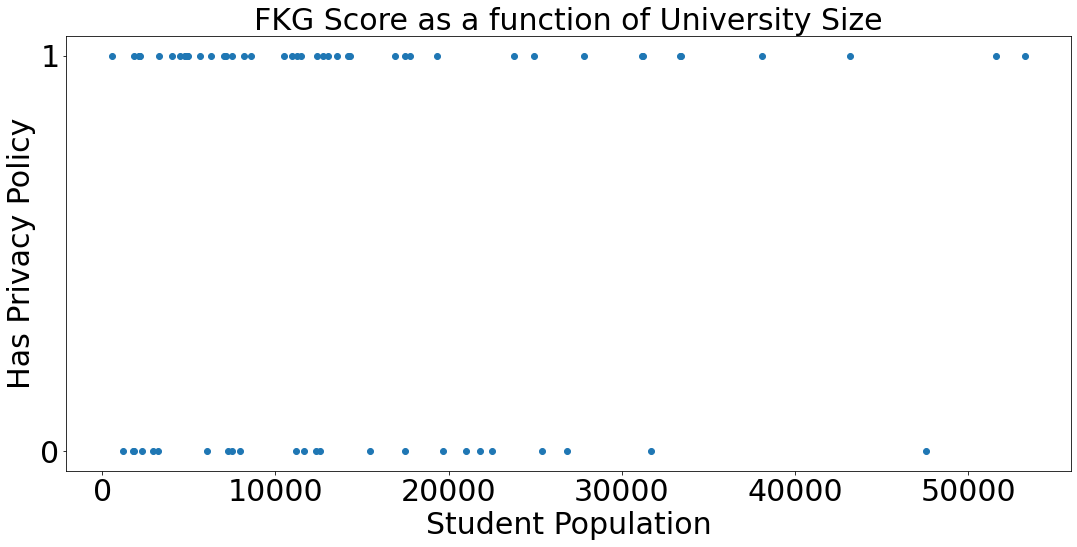

In [50]:
fig = plt.figure(figsize=(18,8))

plt.scatter(student_population, has_privacy_policy)
plt.title('FKG Score as a function of University Size', fontsize=30)
plt.xlabel('Student Population', fontsize=30)
plt.ylabel('Has Privacy Policy', fontsize=30)

#plt.xticks(np.arange(0, 9000, 500))
plt.yticks(np.arange(0, 1.1, 1), fontsize=30)
plt.xticks(fontsize=30)
plt.savefig(f'../figures/has_privacy_policy_student_size.png')

plt.show()



In [51]:
len(student_population)

69

In [52]:
has_self_reporting_mechanims = 0;
has_privacy_policy = 0
is_covid_specific = 0
has_self_reporting_site = 0
universities = []
#Scores = {"FKGScores":FKGScores, "FRESScores":FRESScores, "NDCScores":NDCScores, "GFIScores":GFIScores, "SMOGScores":SMOGScores}
#step = 1
for dirPath, dirNames, fileNames in os.walk(r"../data", topdown=False):
    #print(dirPath)
    #print(dirNames)
    #print(dirPath[-2:])
    #print(step)
    #step += 1
    for f in fileNames:
        #print(os.path.join(dirPath, f))
        #print(dirPath[36:])
        #print(dirNames)
        if f == "privacy_policy.json":
            with open(os.path.join(dirPath, f), 'r', encoding='utf-8') as json_file:

                data = json.load(json_file)
                
                if data.get("has_self_reporting_site") or (data.get("note") and "testing" not in data.get("note")):
                    has_self_reporting_mechanims = has_self_reporting_mechanims+1
                if data.get("has_self_reporting_site"):
                    has_self_reporting_site = has_self_reporting_site+1
                if data.get("privacy_policy"):
                    policy = data["privacy_policy"][0]          
                    if policy.get("policy_text"):
                        has_privacy_policy=has_privacy_policy+1
                    if policy.get("is_covid_specific"):                        
                        is_covid_specific=is_covid_specific+1
                        university_name = dirPath.split('/')[3]
                        universities.append(university_name)

                    if data.get("note"):
                        print(dirPath)
                        print(data.get("note"))

                        

../data/OK/Northeastern State University
self-reporting is via email
../data/HI/University of Hawaii at Hilo
report by phone call
../data/NJ/New Jersey City University
self-reporting via phone
../data/WY/University of Wyoming
no self-reporting; testing
../data/AR/University of Arkansas-Fort Smith
report via phone 479-788-7080 or email hrdept@uafs.edu
../data/MA/Massachusetts College of Liberal Arts
report via phone number 413-662-5550
../data/PA/Shippensburg University of Pennsylvania
self-reporting is via email
../data/VA/James Madison University
self-reporting site is locked behind login
../data/NE/University of Nebraska-Lincoln
self-reporting site is via email
../data/SC/Lander University
self-reporting is via email
../data/NH/University of New Hampshire-Main Campus
no self-reporting, mandatory testing
../data/NH/Plymouth State University
no self-reporting, mandatory testing
../data/NC/Winston-Salem State University
no self-reporting, testing
../data/NC/University of North Carolina 

In [53]:
print(has_self_reporting_mechanims)
print(has_privacy_policy)
print(is_covid_specific)
print(has_self_reporting_site)

79
64
29
58


In [54]:
lees_univ = ['Colorado State University-Fort Collins', 'Dakota State University',
 'Henderson State University', 'Kean University',
 'Kutztown University of Pennsylvania', 'Navajo Technical University',
 'Northeastern State University', 'Rhode Island College',
 'Saint Cloud State University', 'South Dakota State University',
 'University of Arkansas-Fort Smith',
 'University of Colorado DenverAnschutz Medical Campus',
 'University of Connecticut', 'University of Delaware',
 'University of Hawaii at Hilo', 'University of Hawaii at Manoa',
 'University of Illinois at Urbana-Champaign',
 'University of Mary Washington', 'University of Nebraska-Lincoln',
 'University of Nevada-Las Vegas',
 'University of North Carolina Wilmington',
 'University of South Carolina Beaufort', 'Utah State University',
 'Washburn University', 'Western Kentucky University',
 'Westfield State University', 'Winston-Salem State University']

diff = [unv for unv in universities if unv not in lees_univ]
print(diff)
print(universities)

['The University of Alabama', 'University of Florida']
['Dakota State University', 'South Dakota State University', 'Colorado State University-Fort Collins', 'University of Colorado DenverAnschutz Medical Campus', 'University of Illinois at Urbana-Champaign', 'Northeastern State University', 'University of Hawaii at Manoa', 'University of Hawaii at Hilo', 'Kean University', 'University of Arkansas-Fort Smith', 'Henderson State University', 'Westfield State University', 'Kutztown University of Pennsylvania', 'University of Mary Washington', 'University of Nebraska-Lincoln', 'University of South Carolina Beaufort', 'Washburn University', 'The University of Alabama', 'Winston-Salem State University', 'University of North Carolina Wilmington', 'University of Delaware', 'Western Kentucky University', 'Utah State University', 'Navajo Technical University', 'Rhode Island College', 'University of Nevada-Las Vegas', 'Saint Cloud State University', 'University of Florida', 'University of Connect